# **Atividade 0: Brincando com Spikes**

Introdução à Neurociência Computacional — prof. Bóris Marin

## **Aquecimento**

Reproduza a figura 5B do [artigo clássico de Adrian e Zotterman](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1514782/?page=10), que dá a resposta (em termos da frequência de disparos) de um receptor de estiramento muscular, em função da carga aplicada. 

Text(0.5, 1.0, 'Resposta de um receptor de estiramento muscular em função da carga aplicada')

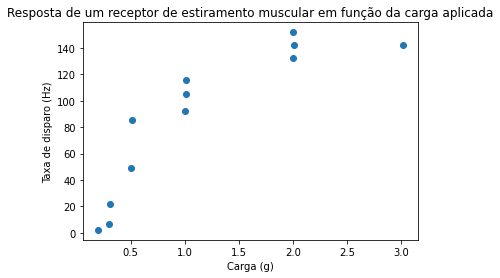

In [38]:
import matplotlib.pyplot as plt

carga = [0.20, 0.30, 0.31, 0.50, 0.51, 1.01, 1.01, 1.00, 2.00, 2.01, 2.00, 3.01]
taxa = [2.15, 6.80, 21.86, 49.09, 85.45, 115.97, 105.06, 92.07 , 151.81, 141.94, 132.59, 142.46]

plt.plot(carga, taxa, 'o')
plt.xlabel("Carga (g)")
plt.ylabel("Taxa de disparo (Hz)")
plt.title("Resposta de um receptor de estiramento muscular em função da carga aplicada")

Text(0.5, 1.0, 'Resposta de um receptor de estiramento muscular em função da carga aplicada')

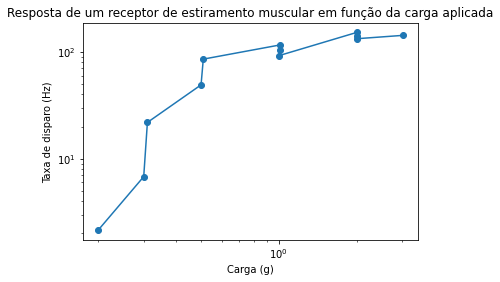

In [39]:
plt.loglog(carga, taxa, '-o')
plt.xlabel("Carga (g)")
plt.ylabel("Taxa de disparo (Hz)")
plt.title("Resposta de um receptor de estiramento muscular em função da carga aplicada")

O que você pode concluir deste gráfico? 

Os dados do experiemento parecem estar seguindo uma função logaritima, ou seja os dado inicialmente respondem ao estimulo mas saturam e não estimulam tanto mais (embora não converge  a um valor final).

## **Trabalhando com Dados**

Trabalharemos agora com séries temporais para o potencial de membrana de determinada célula para um experimento similar ao do item anterior, disponibilizadas juntamente com este enunciado no Moodle, ou neste link. Em cada linha do arquivo de dados, a primeira coluna representa o estímulo aplicado (analogamente à massa nos experimentos de Adrian, mas neste caso uma corrente injetada na célula, em pA), enquanto as colunas subsequentes contêm os valores do potencial de membrana (mV) para cada instante de tempo adquirido no experimento (duração total: 2s)


**1) Construa gráficos de algumas das séries temporais para explorar o conjunto de dados. O que podemos concluir acerca destes experimentos?**

In [ ]:
import numpy as np

dados = np.genfromtxt('https://raw.githubusercontent.com/borismarin/sample-data/master/neuro-comp/i_V_pyr1.dat')

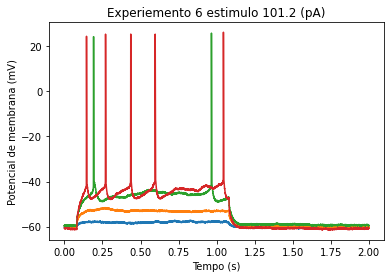

In [43]:
def faz_grafico_experiemento(numero):
  numpontos = 20000
  tempo = np.arange(numpontos) * 2/numpontos
  v_experiemento = dados[numero, 1:]
  estimulo = round(dados[numero, 0], 2)
  plt.plot(tempo, v_experiemento)
  plt.xlabel("Tempo (s)")
  plt.ylabel("Potencial de membrana (mV)")
  # plt.title(f"Experiemento {numero} estimulo {estimulo} (pA)")

plt.figure()
faz_grafico_experiemento(0)
faz_grafico_experiemento(2)
faz_grafico_experiemento(4)
faz_grafico_experiemento(6)

# plt.title("Resposta de um receptor de estiramento muscular em função da carga aplicada")

Podemos observar que claramente os estimulos duram cerca de 1 segundo devido a falta de potencial após 1 segundo. Observamos também nos primeiros experiementos com baixo valor de estimulo não ocorre picos, tendo assim um valor minimo do estimulo.

**2) Construa um raster plot que permita visualizar todos os dados simultaneamente. Fica mais fácil de justificar o item anterior?**

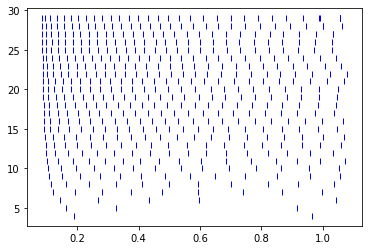

In [29]:
plt.figure()

def encontra_cruzamentos(serie, limiar):
  return (serie < limiar) & (np.roll(serie, -1) >=  limiar)

for i, linha in enumerate(dados):
  estimulo = linha[0]
  v = linha[1:]
  disparos = encontra_cruzamentos(v, -20)
  count_diparos = np.count_nonzero(disparos)
  plt.plot(tempo[disparos], i * np.ones(count_diparos), '|b')

Sim, com a visualização atual conseguimos observar como conforme vai crescendo o numero do experiemento e de maneira análago o valor do estimulo, vai se tendo mais picos de resposta.


**3) Construa um gráfico análogo àquele do item zero (frequência de disparo × intensidade do estímulo)**

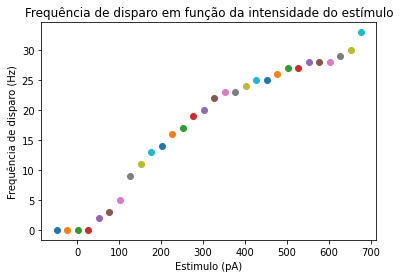

In [31]:
plt.figure()

def encontra_cruzamentos(serie, limiar):
  return (serie < limiar) & (np.roll(serie, -1) >=  limiar)

for i, linha in enumerate(dados):
  estimulo = linha[0]
  v = linha[1:]
  disparos = encontra_cruzamentos(v, -20)
  count_diparos = np.count_nonzero(disparos)
  # plt.plot(tempo[disparos], i * np.ones(count_diparos), '|b')
  plt.plot(estimulo, count_diparos, 'o')
  plt.xlabel("Estimulo (pA)")
  plt.ylabel("Frequência de disparo (Hz)")
  plt.title("Frequência de disparo em função da intensidade do estímulo")

Nesse experiemento não aparece ocrrer satuação, o disparo a partir do quarto experiemento ocorre de maneira proporcional ao estimulo. Poderia inclusiver ser encontrado a equação da reta que modela essa relação estimulo-diparo.